# Simple Linear Regression To predict Height Based On Weight

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## EDA

Read the data and print out the first 5 rows 

In [2]:
height_weight_df = pd.read_csv('height-weight.csv')
height_weight_df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Describe the data

In [3]:
height_weight_df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


check for any missing values 

In [4]:
height_weight_df.isna().sum()

Weight    0
Height    0
dtype: int64

## correlation

#### plot the values of weight against height to visualize the relation

Text(0.5, 1.0, 'Height vs Weight')

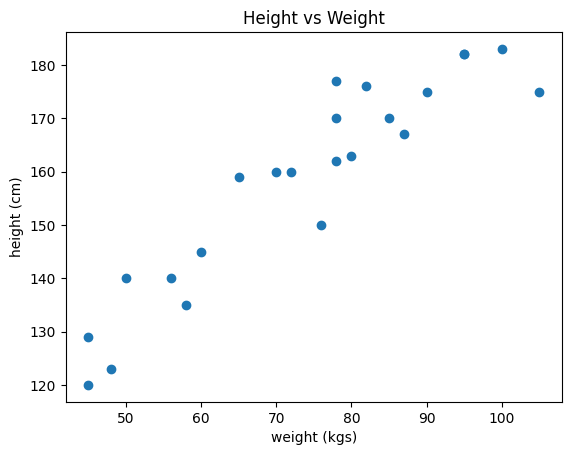

In [5]:
plt.scatter(height_weight_df['Weight'], height_weight_df['Height'])
plt.xlabel('weight (kgs)')
plt.ylabel('height (cm)')
plt.title('Height vs Weight')

In [6]:
height_weight_df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


#### visualize the correlation using a heatmap

<Axes: >

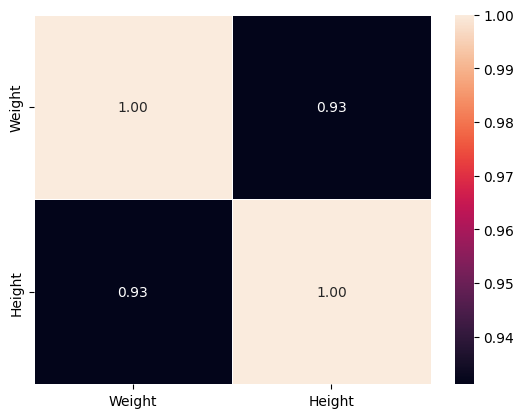

In [7]:
sns.heatmap(height_weight_df.corr(),annot=True, fmt='.2f', linewidths=0.5)

pair plot the independent variable (weight) and dependant variable (height)

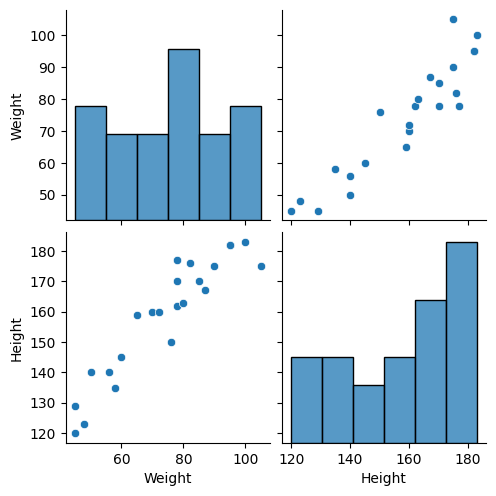

In [8]:
sns.pairplot(height_weight_df)

## Model

#### picking dependant and independant variables

+ X_weight as the independant variable 

In [9]:
X_weight = height_weight_df[['Weight']]

+ y_height as the dependant variable

In [10]:
y_height = height_weight_df['Height']

##### split the data to train and test data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_weight, y_height, test_size=.25, random_state=42)

#### normalize the variables

In [13]:
from sklearn.preprocessing import StandardScaler


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [15]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

#### build model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression(n_jobs=-1)

In [18]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

+ get the coefficient 

In [19]:
regression.coef_

array([17.2982057])

+ get the y intecept

In [20]:
regression.intercept_

156.47058823529412

#### plot the line of best fit

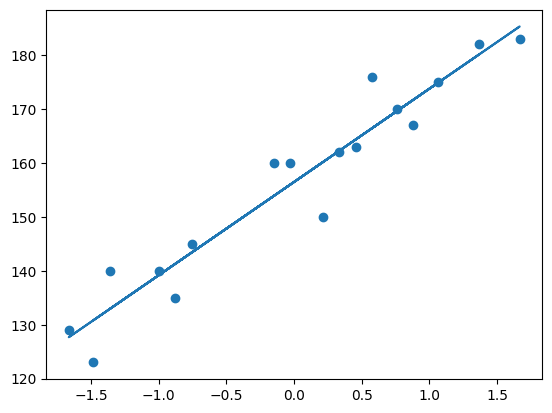

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train))

#### predictions according the regression model

In [22]:
y_predict = regression.predict(X_test)
y_predict

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

## perfomance metrics


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [24]:
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)

print( {
'MAE' : MAE,
'MSE' : MSE,
'RMSE' : RMSE
})

{'MAE': 9.66512588679501, 'MSE': 114.84069295228699, 'RMSE': 10.716374991212605}


#### R Squared

In [25]:
r2 = r2_score(y_test, y_predict)
r2

0.7360826717981276

#### adjusted R Squared

The formula for adjusted R squared is:
        <h3 style="padding-left:100px">1-[(1-r2)*(n-1)/(n-k-1)]</h3>
where:
    <p style="padding-left:25px">r2 is the r squared for the model, n is the number of observations and K is the number of predictor variables</p> 

In [26]:
1-((1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6701033397476595

## OLS method for linear regression

In [27]:
import statsmodels.api as sm

In [28]:
model = sm.OLS(y_train,X_train).fit()

In [29]:
y_predictions = model.predict(X_test)

In [30]:
model.summary()

/home/brion/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 13 Nov 2023   Prob (F-statistic):                       0.664
Time:                        12:18:45   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note that the values for coefficient are approximately similar for both models